# Time series plot of COVID-19 cummulative confirmed cases by country

Hiroshi Maruyama (Twitter: @maruyama)

## Log plot of confirmes cases

Data source: Johns Hopkins University Center for Systems Science and Engineering ([GitHub](https://github.com/CSSEGISandData/COVID-19), [Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6))


last_date = 4/16/20


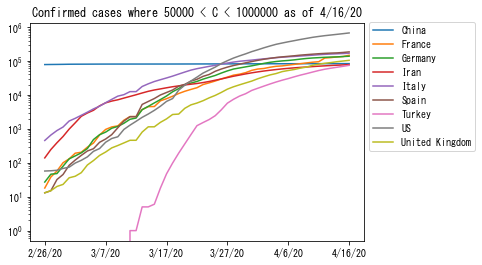

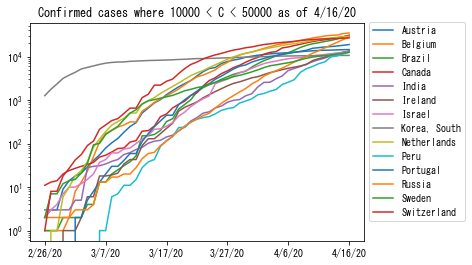

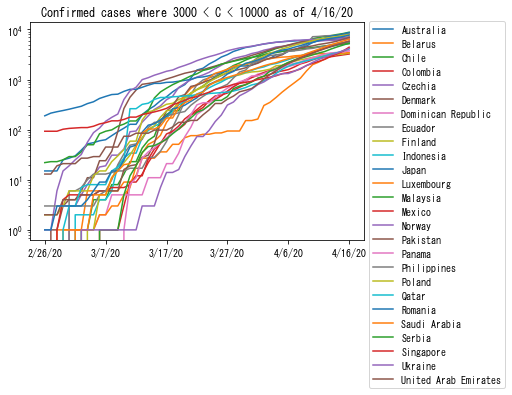

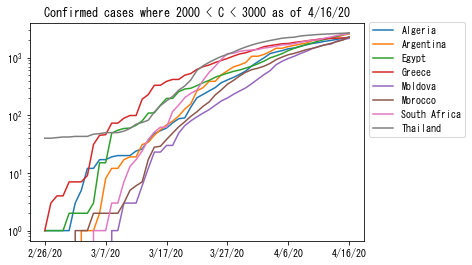

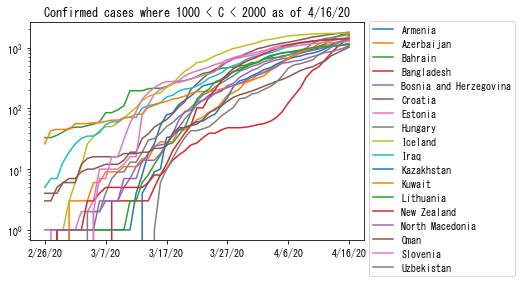

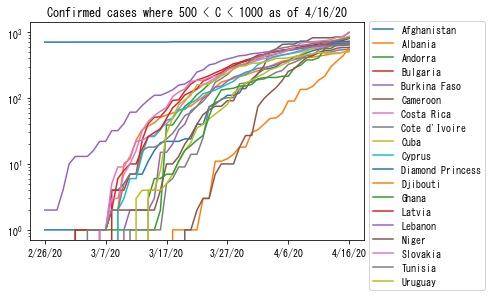

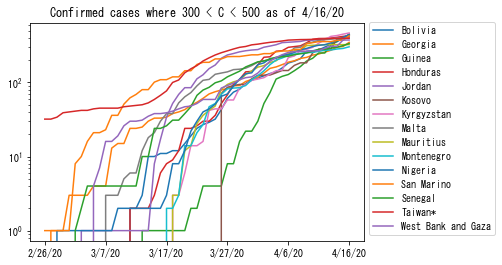

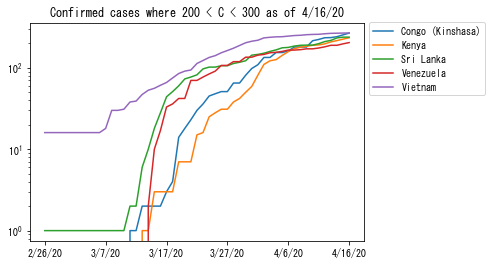

In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def read_csse(fn):
    csse_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
    df = pd.read_csv(csse_path + fn)
    df = df.drop(columns=["Lat", "Long"])
    df =df.groupby("Country/Region").sum()
    return df

# Note that the data is cummulative
df_cases = read_csse('time_series_covid19_confirmed_global.csv')
df_deaths = read_csse('time_series_covid19_deaths_global.csv')
    
last_date = df_cases.columns[-1]
print("last_date =", last_date)

def plot_log_confirmed(min, max):
    t = df_cases[(min <= df_cases[last_date]) & (df_cases[last_date] < max)  ].T
    title = "Confirmed cases where {} < C < {} as of {}".format(min, max, last_date)
    t[35:].plot(logy=True, title=title).legend(bbox_to_anchor=(1, 1.03), loc='upper left')

plot_log_confirmed(50000, 1000000)
plot_log_confirmed(10000,   50000)
plot_log_confirmed( 3000,   10000)
plot_log_confirmed( 2000,    3000)
plot_log_confirmed( 1000,    2000)
plot_log_confirmed(  500,    1000)
plot_log_confirmed(  300,     500)
plot_log_confirmed(  200,     300)


## Daily growth rate of reported case by country

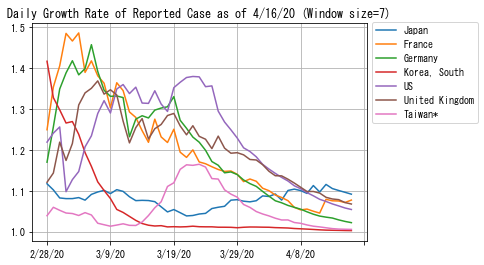

In [15]:
# 日次拡大率（7日間の移動平均）をプロット
# Daily growth rate of reported case by country (moving average of windows size = 7)
countries = ("Japan", "France", "Germany", "Korea, South", "US", "United Kingdom", "Taiwan*")
# countries = ("Japan", "France", "Germany", "US", "Singapore", "United Kingdom", "Spain", "Switzerland")
window = 7
daily_r = df_cases.T.pct_change() + 1.0
# daily_r.iloc[30:].loc[:, countries].rolling(window).mean().iloc[window:].plot(title="Daily Reproduction Rate by Country (Window size={})".format(window))

data_to_plot = np.exp(np.log(daily_r.iloc[30:].loc[:, countries]).rolling(window).mean().iloc[window:])
title = "Daily Growth Rate of Reported Case as of {} (Window size={})".format(last_date, window)
data_to_plot.plot(title=title, grid=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')
# data_to_plot

## Daily reported cases and reported death

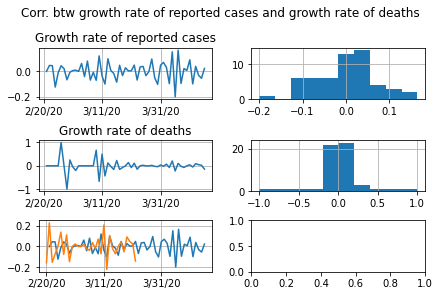

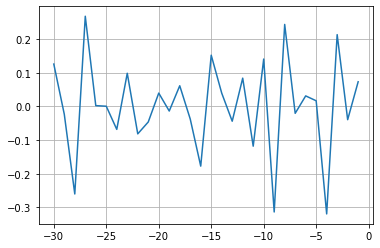

In [3]:
window = 1
date_to_cross_100_cases = "2/20/20"
c = (df_cases.loc["Japan"].pct_change() + 1.0).rolling(window).mean()[date_to_cross_100_cases:]
d = (df_deaths.loc["Japan"].pct_change() + 1.0).rolling(window).mean()[date_to_cross_100_cases:]
c = c.diff()
d = d.diff()

fig, axs = plt.subplots(3, 2, constrained_layout=True)
fig.suptitle("Corr. btw growth rate of reported cases and growth rate of deaths") 
c.plot(ax=axs[0, 0], grid=True, title="Growth rate of reported cases")
c.hist(ax=axs[0, 1])
d.plot(ax=axs[1, 0], grid=True, title="Growth rate of deaths")
d.hist(ax=axs[1, 1])


c.plot(ax=axs[2, 0], grid=True)
d.shift(-24).plot(ax=axs[2, 0], grid=True)
plt.show()
# df = pd.DataFrame([c,d.shift(-10)], index=["Cases", "Deaths"]).dropna(axis=1)
# df.T.plot()

maxlag = 30
corr = np.zeros(maxlag)
for lag in range(30):
    df = pd.DataFrame([c,d.shift(-lag)],index=["Cases", "Deaths"]).dropna(axis=1).T
    #df.plot(title="Lag = {}".format(lag))
    #plt.show()
    corr[lag] = df["Cases"].corr(df["Deaths"])

plt.grid(which="both")
plt.plot(np.arange(-maxlag, 0), corr)

C:\Users\hmaru\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Cases,Deaths
2/20/20,NaN,NaN
2/21/20,-0.002026,0.000000e+00
2/22/20,0.044883,0.000000e+00
2/23/20,0.043013,0.000000e+00
2/24/20,-0.123285,0.000000e+00
2/25/20,-0.012450,0.000000e+00
2/26/20,0.042582,1.000000e+00
2/27/20,0.020510,0.000000e+00
2/28/20,-0.066855,-1.000000e+00
2/29/20,-0.008403,2.500000e-01


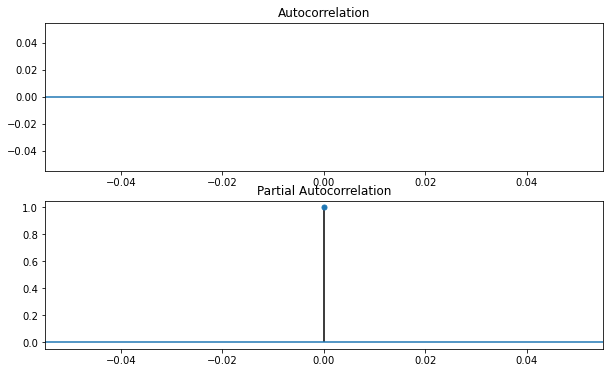

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.DataFrame({"Cases":c, "Deaths":d})
fig, ax = plt.subplots(2, figsize=(10,6))
ax[0] = plot_acf(df.Cases, ax=ax[0])
ax[1] = plot_pacf(df.Deaths, ax=ax[1])

df

## (Deprecated) Japanese daily increase rate of reported case by prefecture

Data source: Toyo Keizai Online

Thanks to [Kazuki Ogiwara](https://toyokeizai.net/list/author/%E8%8D%BB%E5%8E%9F+%E5%92%8C%E6%A8%B9) of Toyo Keizai Online ([GitHub](https://github.com/kaz-ogiwara/covid19/), [Dashboard](https://toyokeizai.net/sp/visual/tko/covid19/))

In [5]:
if 0:

    %matplotlib inline
    import pandas as pd
    import numpy as np

    import matplotlib as mpl
    import matplotlib.pyplot as plt
    font = {'family' : 'MS Gothic'}
    mpl.rc('font', **font)


    df = pd.read_csv('https://raw.githubusercontent.com/kaz-ogiwara/covid19/master/data/individuals.csv', 
                     parse_dates=[["確定年", "確定月", "確定日"]])
    print("len=", len(df))
    # display(df)
    # print(df.columns)
    df = df.drop(['新No.', '旧No.', '年代', '性別', '居住地2', '備考'], axis=1)

    # df.groupby("居住地").count()
    #df.groupby(["確定年", "確定月", "確定日"]).count()
    def get_data_by_pref(pref):  # 県ごとのデータを取得
        ts = df[df["居住地1"] == pref].groupby("確定年_確定月_確定日").count()
        ts.reset_index(inplace = True)
        # ts = ts.rename(columns={'確定年_確定月_確定日': '確定日',"居住地":"愛知県" })
        ts = ts.rename(columns={'確定年_確定月_確定日': '確定日',"居住地1" : pref})
        # ts = ts.set_index("確定日")
        return ts

    fig = plt.figure()
    window = 5
    pref_data = get_data_by_pref("東京都")

    for pref in ("愛知県", "北海道", "大阪府", "兵庫県", "神奈川県","千葉県","埼玉県","京都府","新潟県"):
        pref_data = pref_data.merge(get_data_by_pref(pref), how='outer', sort=True)
        # print(pref_data.describe())
    # get_data_by_pref("東京都")
    pref_data = pref_data.set_index("確定日")
    last_date = pref_data.index[-1].date()

    title = "都道府県別感染者報告数拡大率({}日間の移動平均) {}".format(window, last_date)

    data_to_plot = np.exp(np.log(pref_data.loc["2020-03-1":,:].fillna(0).cumsum().pct_change() + 1.0).rolling(window).mean()).iloc[window:, :]
    data_to_plot.plot(title=title, ylim=[0.98, 1.2], grid=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')
    # data_to_plot


# Japanese daily increase rate by prefecture

Data source: [Jag Japan](https://gis.jag-japan.com/covid19jp/)

症例数= 7622


<Figure size 432x288 with 0 Axes>

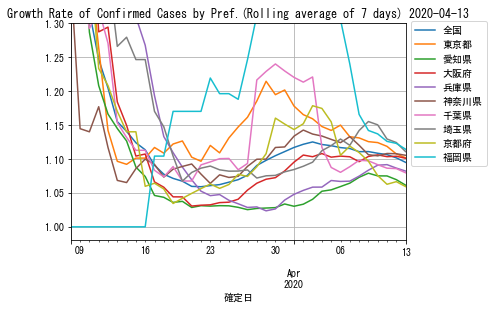

In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'family' : 'MS Gothic'}
mpl.rc('font', **font)

fn = 'https://dl.dropboxusercontent.com/s/6mztoeb6xf78g5w/COVID-19.csv'
fn = 'data/JAG_Japan/COVID-19.csv'

def read_data():
    d = pd.read_csv(fn,usecols=["確定日", "受診都道府県"],parse_dates=["確定日"])
#    d = d.drop(["不明", "中部国際空港", "成田空港", "羽田空港", "関西国際空港"], errors='ignore') 
    d = d.dropna(how='all')
    print("症例数=", len(d))
    return d

def get_data_by_pref(df, pref):  # 県ごとのデータを取得
    ts = df[df["受診都道府県"] == pref].groupby("確定日").count()
    ts.reset_index(inplace = True)
    # ts = ts.rename(columns={'確定年_確定月_確定日': '確定日',"居住地":"愛知県" })
    ts = ts.rename(columns={"受診都道府県" : pref})
    # ts = ts.set_index("確定日")
    return ts

df = read_data()
window = 7

# print(df.groupby("確定日").count().rename(columns={"受診都道府県" : "全国"}).reset_index())

pref_data = df.groupby("確定日").count().rename(columns={"受診都道府県" : "全国"}).reset_index()
# pref_data = get_data_by_pref(df, "東京都")
# print(pref_data)

for pref in ("東京都", "愛知県", "大阪府", "兵庫県", "神奈川県","千葉県","埼玉県","京都府","福岡県"):
    d = get_data_by_pref(df, pref)
    pref_data = pref_data.merge(d, how='outer', sort=True)

# pref_data = get_data_by_pref(df, "東京都")

pref_data = pref_data.set_index("確定日")
last_date = pref_data.index[-1].date()

# display(pref_data)

fig = plt.figure()
title = "都道府県別感染者報告数拡大率({}日間の移動平均) {}".format(window, last_date)
title = "Growth Rate of Confirmed Cases by Pref.(Rolling average of {} days) {}".format(window, last_date)

data_to_plot = np.exp(np.log(pref_data.loc["2020-03-1":,:].fillna(0).cumsum().pct_change() + 1.0).rolling(window).mean()).iloc[window:, :]
data_to_plot.plot(title=title, ylim=[0.98, 1.3], grid=True).legend(bbox_to_anchor=(1, 1.03), loc='upper left')
# data_to_plot

## Projection of confirmed cases by different reproduction rates


last_date= 4/15/20
I0= 8100


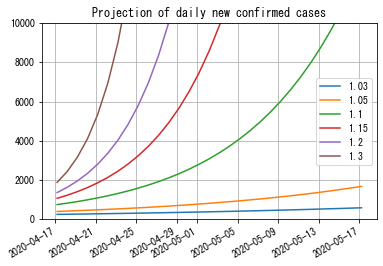

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

start_date = pd.Timestamp.today()
end_date = start_date + pd.Timedelta('30 Days')
# print(country_df)
last_date = df_cases.columns[-1]
print("last_date=", last_date)
# display(country_df)
I0 = df_cases.loc["Japan",last_date]
print("I0=", I0)
reproduction_rates = np.array([1.03, 1.05, 1.1, 1.15, 1.2, 1.3])

dates = pd.date_range(start_date, end_date)
c = np.zeros((len(dates), len(reproduction_rates)))
for i in range(len(reproduction_rates)):
    c[:,i] = reproduction_rates[i] ** (np.arange(len(dates)) - 1) * I0 * (reproduction_rates[i] - 1)


sim = pd.DataFrame(c, index=dates, columns=reproduction_rates)
title="Projection of daily new confirmed cases"
sim.plot(ylim=[0, 10000], title=title, grid=True)


# Reporting Delay from Onset
Data source: [Jag Japan](https://gis.jag-japan.com/covid19jp/)

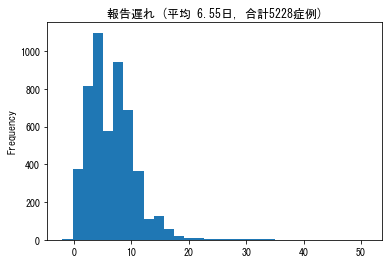

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'family' : 'MS Gothic'}
mpl.rc('font', **font)
fn = 'https://dl.dropboxusercontent.com/s/6mztoeb6xf78g5w/COVID-19.csv'
# fn = 'data/JAG_Japan/COVID-19.csv'

def read_data():
    d = pd.read_csv(fn,usecols=["確定日", "発症日", "受診都道府県"],parse_dates=["確定日", "発症日"])
    d = d.drop(["不明", "中部国際空港", "成田空港", "羽田空港", "関西国際空港"], errors='ignore')
    return d

df = read_data()
# h = df["発症日"]
#for i in range(len(h)):
#    print(i, h[i])
#    x = pd.to_datetime(h[i])
df["報告遅れ"] = (df["確定日"] - df["発症日"]).dt.days
df = df.dropna()
df = df.set_index("確定日")
onset_known = len(df)
m = df["報告遅れ"].mean()
title = "報告遅れ (平均 {:.2f}日, 合計{}症例)".format(m, onset_known)
# df.hist(bins=30)
df["報告遅れ"].plot(kind='hist', bins=30, title=title)
# df["報告遅れ"].plot(kind="box")

# Correlation btw N calls at call center and daily reported cases

Data source: [Tokyo Metropolitan Governmnet Open Data Catalogue Site](https://portal.data.metro.tokyo.lg.jp/) [ダッシュボード](https://stopcovid19.metro.tokyo.lg.jp/)

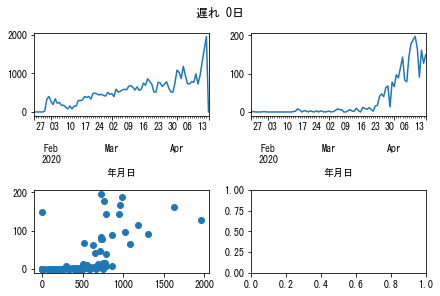

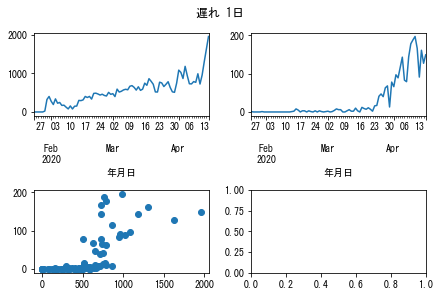

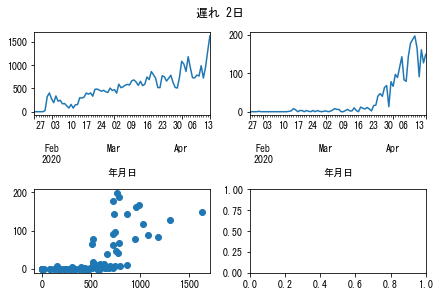

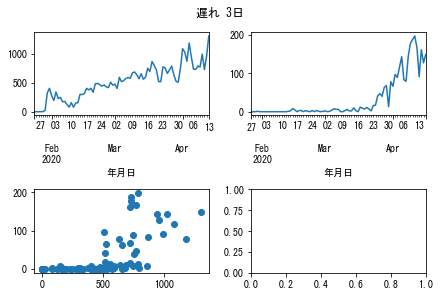

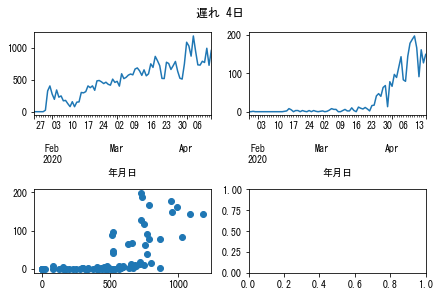

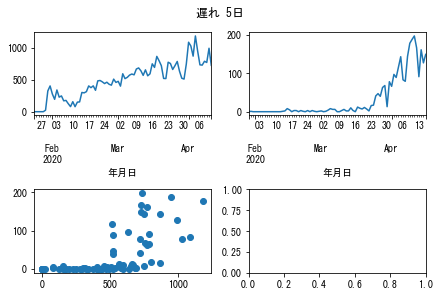

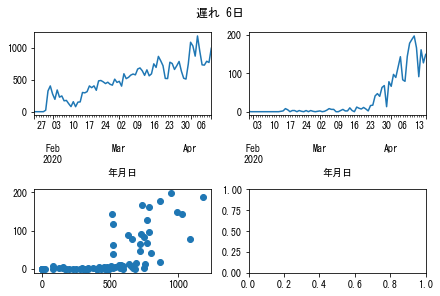

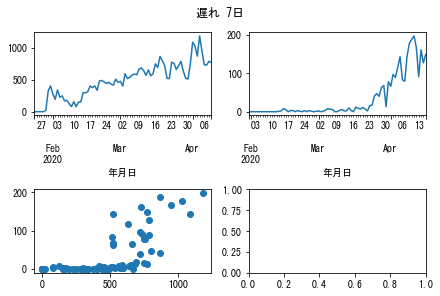

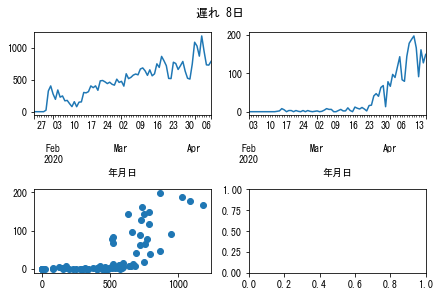

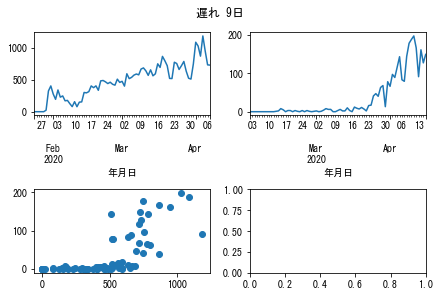

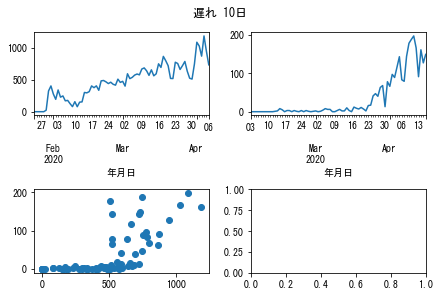

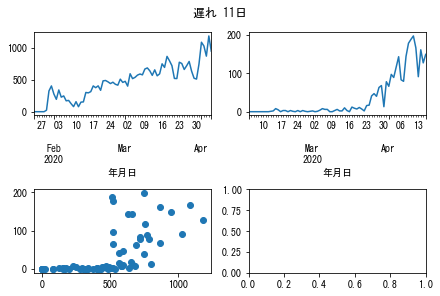

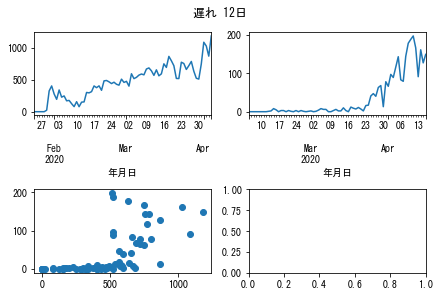

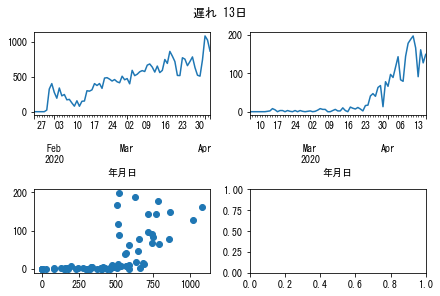

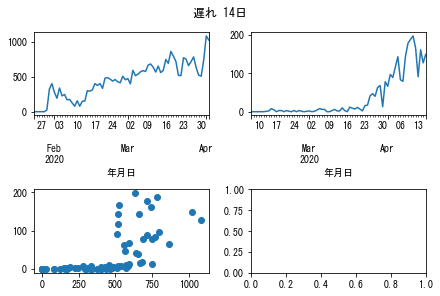

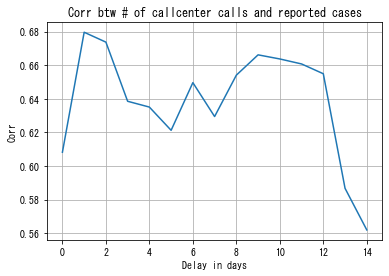

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'family' : 'MS Gothic'}
mpl.rc('font', **font)

daily_confirmed_cases = pd.read_csv('https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv',
                    usecols=["公表_年月日", "患者_年代", "患者_性別"],
                    parse_dates=["公表_年月日"]) \
    .groupby("公表_年月日") \
    .count().drop(columns=["患者_年代"]) \
    .reset_index() \
    .rename(columns={"患者_性別": "確定症例報告数", "公表_年月日": "年月日"})


daily_calls = pd.read_csv('https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_call_center.csv',
                    usecols=["受付_年月日", "相談件数"],
                    parse_dates=["受付_年月日"]) \
    .rename(columns={"受付_年月日":"年月日"})
daily_calls
df = daily_confirmed_cases.merge(daily_calls, how='outer', sort=True).set_index("年月日")
df = df.asfreq('D').fillna(0)
#plt.title("コールセンター相談件数")
#df["相談件数"].plot()
#plt.show()
#plt.title("確定症例数報告数")
#df["確定症例報告数"].plot()
#plt.show()

w = 15  # 何日までのずれをとるか
corr = np.zeros(w)
for d in range(0, w):
    if d==0:
        n_calls = df["相談件数"]
    else:
        n_calls = df["相談件数"][:-d]
    n_reported = df["確定症例報告数"][d:]
    corr[d] = n_calls.corr(n_reported)
    fig, axs = plt.subplots(2, 2, constrained_layout=True)
    fig.suptitle("遅れ {}日".format(d))
    n_calls.plot(ax=axs[0, 0])
    n_reported.plot(ax=axs[0, 1])
    axs[1, 0].scatter(n_calls, n_reported)
    plt.show()
    # print(d, len(n_calls), len(n_reported), corr[d])

plt.grid()
plt.title("コールセンター相談件数と確定症例数の相関係数")
plt.title("Corr btw # of callcenter calls and reported cases")
plt.xlabel("遅れ日数")
plt.ylabel("相関係数")
plt.xlabel("Delay in days")
plt.ylabel("Corr")
plt.plot(np.array(range(0, w)), corr)


# Simulation on High Variability of R

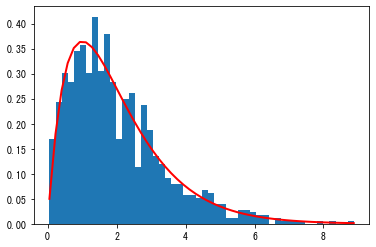

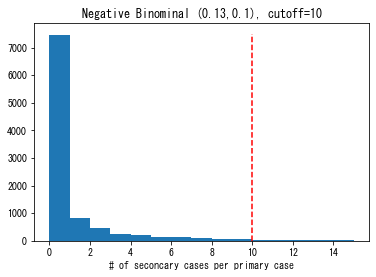

Original mean= 1.1109
Cutoff mean =  0.6525


[6.0, 4.0]

In [10]:
shape, scale = 2., 1.01  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)

import matplotlib.pyplot as plt
import scipy.special as sps
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /
                      (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

p, mean, cutoff = 0.1, 1.3, 10
s = np.random.negative_binomial(p*mean, p, 10000)
title = "Negative Binominal ({},{}), cutoff={}".format(p*mean, p, cutoff)
plt.title(title)
plt.xlabel('# of seconcary cases per primary case')
plt.vlines([cutoff], 0, np.max(7500), "red", linestyles='dashed')
plt.hist(s, range=(0,15), bins=15)
plt.show()
print("Original mean=", np.mean(s))
print("Cutoff mean = ", np.mean(np.where(s>=cutoff, 0, s)))
plt.rcParams['figure.figsize']